In [1]:
AQUISICAO = dlmread('R3_64V_1.csv');
AQUISICAO = AQUISICAO((find(AQUISICAO(:,2)>0.1,1)):end,:);
M1 = AQUISICAO(1:30000,2)*1; % o vezes 10 vem da ponteira de corrente
Ts = (AQUISICAO(2,1)-AQUISICAO(1,1)); %Período de amostragem;
Fs= 1/Ts; %Frequência de Amostragem do Sinal;

In [2]:
f0 = 36;
sigma = 0.019   ;            % Desvio Padrão
sl = 4; % quantos sigmas?
l = -sl*sigma:Ts:sl*sigma;            % Tamanho do filtro
tam_j = Fs/10; % tamanho da janela usado no comando movmax
tam_l = length(l);
wo = 2*pi*f0;               % Frequência principal
cst = 1/(sigma*sqrt(2*pi));
h = cst*exp(-l.^2/(2*sigma^2));
h = h.*sin(wo*l);           % MODULAÇÃO AM. O ESPECTRO EH UMA JANELA CENTRADA NA FREQUÊNCIA CALCULADA
filtro = h;

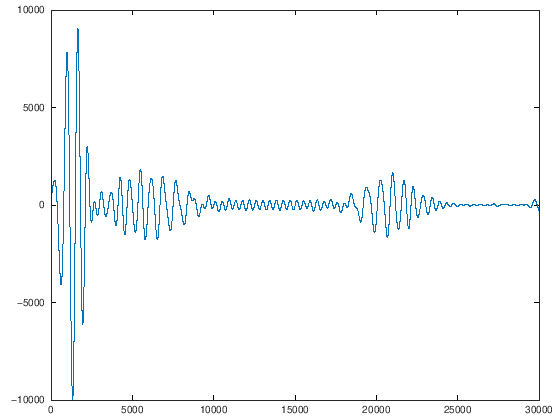

In [3]:
R_27 = conv(M1,filtro);  
xM1 = R_27(round(length(filtro)/2):round((length(filtro)/2+length(M1)-1))); % Corta o começo e fim da convolução
plot(xM1)

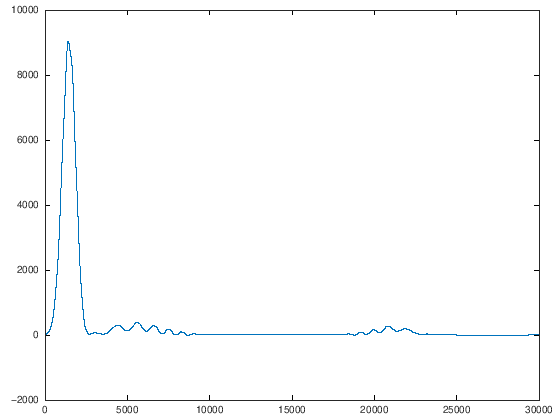

In [7]:
%==================Teager Energy===========================================
e1=xM1(2:end-1).^2-xM1(1:end-2).*xM1(3:end);

%================== Máximos ===========================================
plot(e1) % vê facilmente os máximos 